In [1]:
from matplotlib.collections import PathCollection
from scipy.stats import beta

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy.typing as npt
import matplotlib as mpl
import pandas as pd
import numpy as np
import ast
import os

In [2]:
def gen_nulls_fig(file_name: str, scenario_name: str) -> plt.Figure:
    """
    Generates a matplotlib figure visualizing null probabilities for a given scenario.
    The input data is expected to be a 2D NumPy array, where rows represent different
    null scenarios and columns correspond to probability values for distinct categories.
    Each subplot in the generated figure displays a bar chart of probabilities for a
    particular null scenario.

    Parameters
    ----------
    file_name:
        The file path of the NumPy array to load null probabilities from.
    scenario_name:
        The descriptive name of the scenario for which null probabilities
        are being visualized.

    Returns
    -------
    A matplotlib figure containing subplots that visualize null probabilities for
    each scenario row in the loaded data.
    """
    scen_nulls: npt.NDArray[int] = np.load(file=file_name)
    n_nulls, k = scen_nulls.shape
    x: npt.NDArray = np.arange(k) + 1

    fig_, axes_ = plt.subplots(
        nrows=1,
        ncols=n_nulls,
        figsize=(1.8 * n_nulls, 2.6),
        sharey=True,
        squeeze=False,
        constrained_layout=True,
    )
    axes_1d: list[plt.Axes] = axes_[0]

    for ell_ in range(n_nulls):
        ax_: plt.Axes = axes_1d[ell_]
        p: npt.NDArray[float] = np.asarray(scen_nulls[ell_], dtype=float)

        ax_.bar(x=x, height=p, width=0.9)
        ax_.set_title(label=f"Null $\\ell$={ell_+1}", fontsize=9)
        ax_.set_ylim(ymin=0.0, ymax=1.0)

        if ell_ == 0:
            ax_.set_ylabel(ylabel="Probability", fontsize=9)
        ax_.set_xlabel(xlabel="Category", fontsize=9)

    fig_.suptitle(t=f"{scenario_name}: Null probabilities", fontsize=10)
    return fig_

In [3]:
def gen_alts_fig(file_name: str, scenario_name: str) -> plt.Figure:
    """
    Generates a Matplotlib figure to visualize alternative probability distributions
    from a scenario. Each subplot displays a bar chart of probabilities, sorted by
    mJSd (minimum Jensen-Shannon distance). The figure contains one subplot for
    each alternative probability distribution.

    The input file must be a pickled pandas DataFrame containing a column for mJSd
    values and a column for probability vectors. The vectors are automatically
    interpreted and converted into numerical formats.

    Parameters
    ----------
    file_name
        The path to the pickled DataFrame file containing alternatives' data.
    scenario_name
        The name of the scenario for labeling and title purposes.

    Returns
    -------
    plt.Figure
        The generated Matplotlib figure containing probability distribution visualizations.
    """
    def _as_vector(v) -> np.ndarray:
        """
        Converts the input into a NumPy array of type float. If the input is a string, it
        attempts to parse the string representation of an array into a list of floats
        before conversion.

        This function ensures that the returned object is a NumPy ndarray, regardless
        of whether the input was a list, string, or otherwise.

        Parameters
        ----------
        v:
            The input to be converted. Can be a string representation of an
            array or any other type convertible to a NumPy array.

        Returns
        -------
        A NumPy array with elements converted to float.
        """
        if isinstance(v, str):
            v: list[float] = ast.literal_eval(node_or_string=v)  # parse "[...]" safely
        return np.asarray(a=v, dtype=float)

    scen_alts: pd.DataFrame = pd.read_pickle(filepath_or_buffer=file_name)
    alts: pd.DataFrame = scen_alts[["mjsd", "q_vector"]].copy()
    alts["q_vector"] = alts["q_vector"].apply(_as_vector)

    # Sort axes by mjsd
    alts = alts.sort_values(by="mjsd", ascending=True).reset_index(drop=True)

    a_: int = len(alts)
    fig_, axes_ = plt.subplots(
        nrows=1,
        ncols=a_,
        figsize=(1.8 * a_, 2.6),
        sharey=True,
        squeeze=False,
        constrained_layout=True,
    )
    axes_1d: list[plt.Axes] = axes_[0]  # noqa

    # infer k from vectors (and sanity-check)
    k_alt: int = int(alts["q_vector"].iloc[0].shape[0])
    x: npt.NDArray[int] = np.arange(k_alt)  # noqa

    for i in range(a_):
        ax_: plt.Axes = axes_1d[i]
        mjsd_val: float = float(alts.loc[i, "mjsd"])
        q: list[float] = alts.loc[i, "q_vector"]  # noqa

        ax_.bar(x=x, height=q, width=0.9)
        ax_.set_title(label=f"mJSd={mjsd_val:.3f}", fontsize=9)
        ax_.set_ylim(ymin=0.0, ymax=1.0)

        if k_alt <= 20:
            ax_.set_xticks(ticks=x)
        else:
            ax_.set_xticks(ticks=[])

        if i == 0:
            ax_.set_ylabel(ylabel="Probability", fontsize=9)
        ax_.set_xlabel(xlabel="Category", fontsize=9)

    fig_.suptitle(t=f"{scenario_name}: Alternative probabilities", fontsize=10)
    return fig_

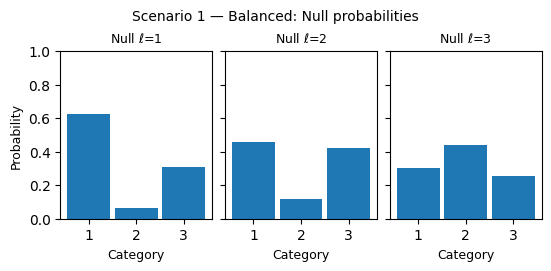

In [4]:
gen_nulls_fig(
    file_name="results/scenario_1_balanced_null_probabilities.npy",
    scenario_name="Scenario 1 — Balanced"
)
plt.show()

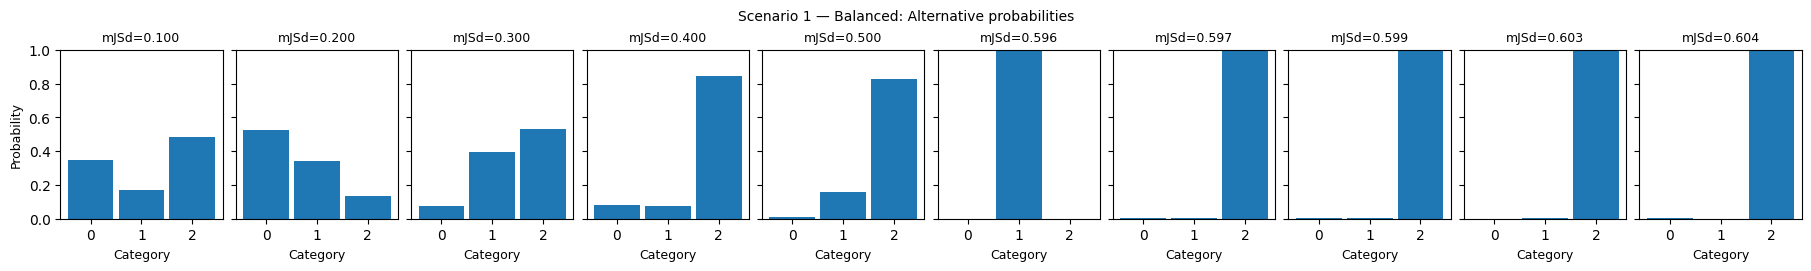

In [5]:
gen_alts_fig(
    file_name="results/scenario_1_balanced_alternatives.pkl",
    scenario_name="Scenario 1 — Balanced"
)
plt.show()

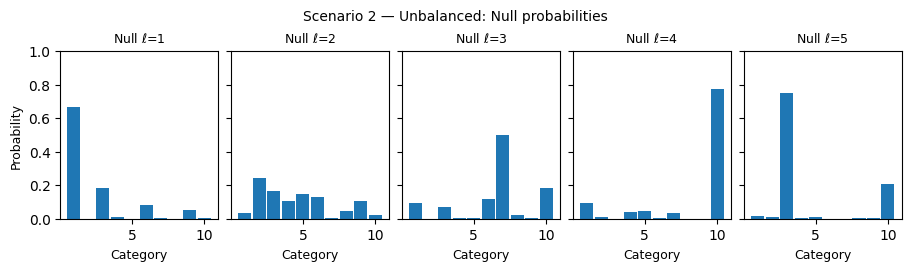

In [6]:
gen_nulls_fig(
    file_name="results/scenario_2_unbalanced_null_probabilities.npy",
    scenario_name="Scenario 2 — Unbalanced"
)
plt.show()

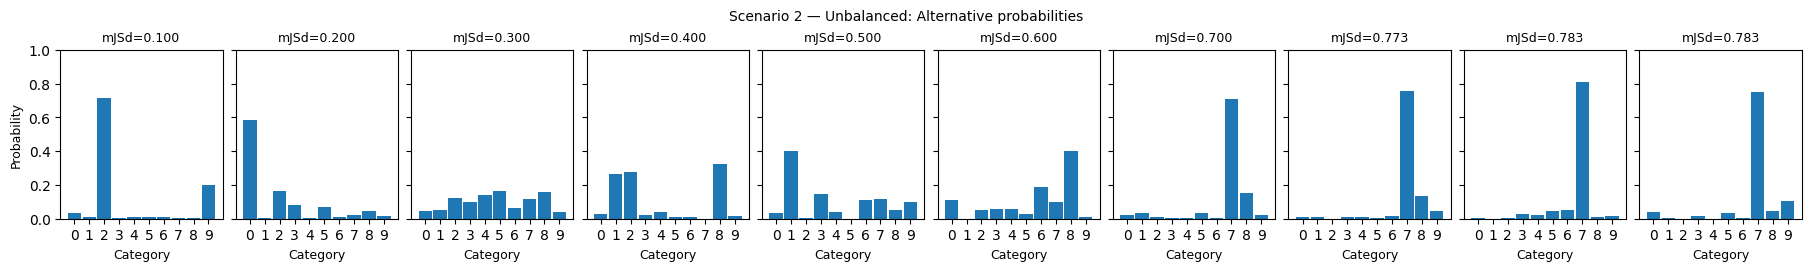

In [7]:
gen_alts_fig(
    file_name="results/scenario_2_unbalanced_alternatives.pkl",
    scenario_name="Scenario 2 — Unbalanced"
)
plt.show()

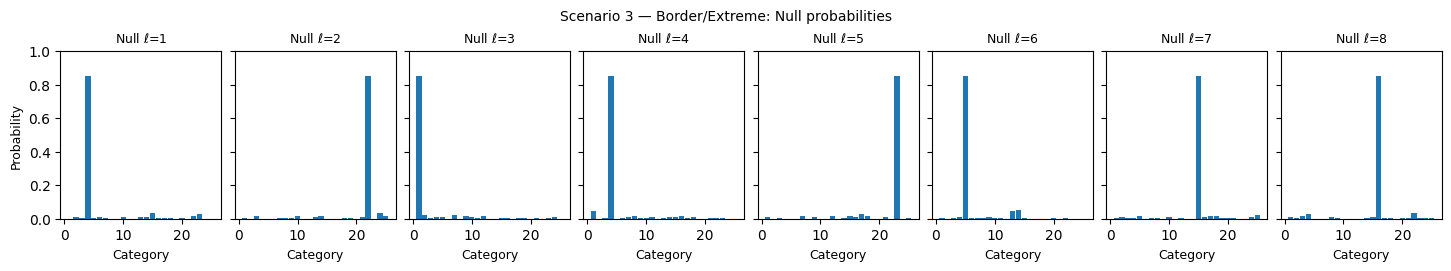

In [8]:
gen_nulls_fig(
    file_name="results/scenario_3_border_extreme_null_probabilities.npy",
    scenario_name="Scenario 3 — Border/Extreme"
)
plt.show()

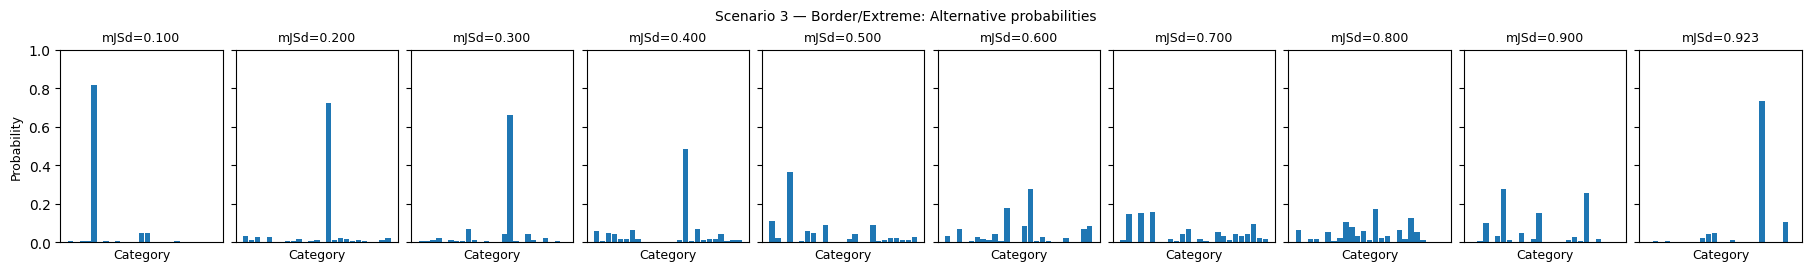

In [9]:
gen_alts_fig(
    file_name="results/scenario_3_border_extreme_alternatives.pkl",
    scenario_name="Scenario 3 — Border/Extreme"
)
plt.show()

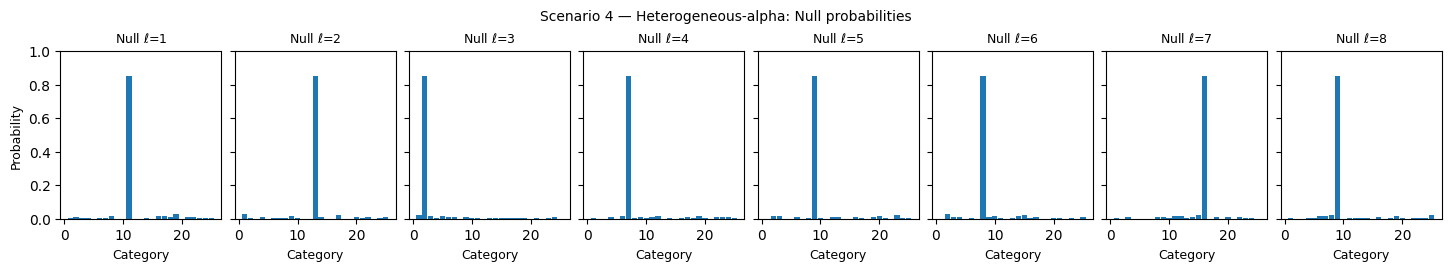

In [10]:
gen_nulls_fig(
    file_name="results/scenario_4_heterogeneous_alpha_null_probabilities.npy",
    scenario_name="Scenario 4 — Heterogeneous-alpha"
)
plt.show()

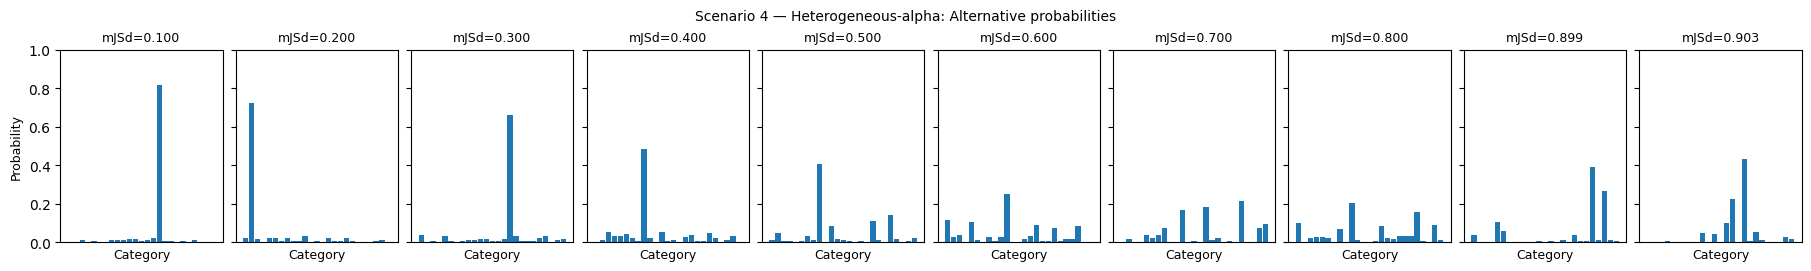

In [11]:
gen_alts_fig(
    file_name="results/scenario_4_heterogeneous_alpha_alternatives.pkl",
    scenario_name="Scenario 4 — Heterogeneous-alpha"
)
plt.show()

In [ ]:
CSV_PATH: str = "results/experiment.csv"
assert os.path.exists(CSV_PATH), f"Missing file: {CSV_PATH}"

df: pd.DataFrame = pd.read_csv(filepath_or_buffer=CSV_PATH, keep_default_na=False, na_values=[""])

print("Rows:", len(df))
print("Columns:", df.columns.tolist())
df

In [13]:
def beta_ci(k: int, n_: int, alpha: float = 0.05) -> tuple[float, float]:
    """
    Compute a Beta-based confidence interval for a binomial proportion.

    This function returns a central (1 - alpha) interval for an unknown
    binomial success probability p, given k observed successes out of n trials.
    It uses Beta quantiles (a conjugate-posterior / "credible"-interval style
    construction), which behaves well in edge cases such as k = 0 or k = n.

    Parameters
    ----------
    k
        Number of observed successes (e.g., count of events of interest).
    n_
        Total number of trials (e.g., number of Monte Carlo repetitions).
    alpha
        Significance level for the interval. The returned interval has nominal
        coverage (1 - alpha). For example, alpha=0.05 corresponds to a 95%
        interval.

    Returns
    -------
    (low, high)
        Lower and upper bounds of the central Beta-quantile interval for the
        success probability p.
    """
    return (
        beta.ppf(q=alpha / 2, loc=k + 1, scale=n_ - k + 1),
        beta.ppf(q=1 - alpha / 2, loc=k + 1, scale=n_ - k + 1),
    )

In [14]:
def classify_decision(row: pd.Series, kind: str) -> str:
    """
    Classify a multi-null decision outcome into an interpretable category.

    The experiment output encodes decisions as:
    - -1: reject all null hypotheses (declare alternative)
    -  1..L: accept/choose a specific null hypothesis index

    Under null-generated data, this function maps a decision to:
    - "reject_all": decision == -1 (Type-I / false positive event)
    - "correct": decision equals the true generating null index (decision == true_id)
    - "misclass": a non-reject decision that selects the wrong null

    Parameters
    ----------
    row
        A row-like object (typically a pandas Series) containing at least the fields:
        - "decision": integer decision code in {-1, 1, ..., L}
        - "true_id": integer index of the true generating distribution
    kind
        The kind of the true distribution ("null" or "alt").

    Returns
    -------
    label
        One of {"reject_all", "correct", "misclass"}.

    Raises
    ------
    valueError
        If an unknown kind is provided.
    """
    if kind == "null":
        if row["decision"] == -1:
            return "reject_all"
        if row["decision"] == row["true_id"]:
            return "correct"
        return "misclass"
    elif kind == "alt":
        if row["decision"] == -1:
            return "correct"
        else:
            return "false_negative"
    else:
        raise ValueError(f"Unknown kind: {kind}")

In [15]:
# Choose facet ordering
scenarios: list[str] = sorted(df["scenario_name"].dropna().unique())
methods: list[str] = [
    "MultiNullJSD",
    "Chi2-Pearson+Holm",
    "G-test-LLR+Holm",
    "MMD-Gaussian+Holm",
    "MMD-Laplacian+Holm",
    "ExactMultinom-Prob+Holm",
    "ExactMultinom-Chisq+Holm",
    "ExactMultinom-LLR+Holm"
]

In [16]:
df_null: pd.DataFrame = df[df["true_kind"] == "null"].copy()
df_null["decision_type"] = df_null.apply(classify_decision, axis=1, kind="null")

df_null

,scenario_name,method,n,true_kind,true_id,decision,count,prop,m,scenario_slug,...,m_alt,runtime_total_s,fwer_hat_empirical,fwer_target_method,n_jobs,n_chunks,parallel_backend,show_progress,mp_start_method,decision_type
0,Scenario 1 — Balanced,MultiNullJSD,1,null,1,-1,0,0.000000,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,reject_all
1,Scenario 1 — Balanced,MultiNullJSD,1,null,1,1,94212,0.628080,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,correct
2,Scenario 1 — Balanced,MultiNullJSD,1,null,1,2,46169,0.307793,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,misclass
3,Scenario 1 — Balanced,MultiNullJSD,1,null,1,3,9619,0.064127,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,misclass
4,Scenario 1 — Balanced,MultiNullJSD,1,null,2,-1,0,0.000000,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,reject_all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72953,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,8,4,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,misclass
72954,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,8,5,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,misclass
72955,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,8,6,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,misclass
72956,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,8,7,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,misclass


In [17]:
df_alt: pd.DataFrame = df[df["true_kind"] == "alt"].copy()
df_alt["decision_type"] = df_alt.apply(classify_decision, axis=1, kind="alt")

df_alt

,scenario_name,method,n,true_kind,true_id,decision,count,prop,m,scenario_slug,...,m_alt,runtime_total_s,fwer_hat_empirical,fwer_target_method,n_jobs,n_chunks,parallel_backend,show_progress,mp_start_method,decision_type
12,Scenario 1 — Balanced,MultiNullJSD,1,alt,1,-1,0,0.000000,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,correct
13,Scenario 1 — Balanced,MultiNullJSD,1,alt,1,1,52533,0.350220,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,false_negative
14,Scenario 1 — Balanced,MultiNullJSD,1,alt,1,2,72097,0.480647,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,false_negative
15,Scenario 1 — Balanced,MultiNullJSD,1,alt,1,3,25370,0.169133,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,false_negative
16,Scenario 1 — Balanced,MultiNullJSD,1,alt,2,-1,0,0.000000,150000,scenario_1_balanced,...,150000,NaN,0.000000,0.05,NaN,NaN,NaN,NaN,NaN,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73043,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,alt,10,4,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,false_negative
73044,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,alt,10,5,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,false_negative
73045,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,alt,10,6,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,false_negative
73046,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,alt,10,7,0,0.000000,150000,scenario_4_heterogeneous_alpha,...,150000,NaN,0.106227,0.10,NaN,NaN,NaN,NaN,NaN,false_negative


In [18]:
null_behavior: pd.DataFrame = (
    df_null
    .groupby(by=["scenario_name", "method", "n", "true_id", "decision_type"])
    .agg(prop_val=("prop", "sum"),
         m_used=("m_used", "first"),
         alpha_target=("alpha_target_per_null", "first"))
    .reset_index()
)

null_behavior

,scenario_name,method,n,true_id,decision_type,prop_val,m_used,alpha_target
0,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,1,correct,0.598000,1000,0.05
1,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,1,misclass,0.402000,1000,0.05
2,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,1,reject_all,0.000000,1000,0.05
3,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,2,correct,0.432000,1000,0.05
4,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,2,misclass,0.568000,1000,0.05
...,...,...,...,...,...,...,...,...
11371,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,7,misclass,0.000000,150000,0.02
11372,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,7,reject_all,0.020133,150000,0.02
11373,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,8,correct,0.989573,150000,0.01
11374,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,8,misclass,0.000000,150000,0.01


In [19]:
alt_behavior: pd.DataFrame = (
    df_alt
    .groupby(by=["scenario_name", "method", "n", "true_id", "decision_type"])
    .agg(prop_val=("prop", "sum"),
         m_used=("m_used", "first"),
         mjsd=("mjsd", "first"))
    .reset_index()
)

alt_behavior

,scenario_name,method,n,true_id,decision_type,prop_val,m_used,mjsd
0,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,1,correct,0.0,1000,0.100000
1,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,1,false_negative,1.0,1000,0.100000
2,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,2,correct,0.0,1000,0.199999
3,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,2,false_negative,1.0,1000,0.199999
4,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,3,correct,0.0,1000,0.300000
...,...,...,...,...,...,...,...,...
13215,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,8,false_negative,0.0,150000,0.800001
13216,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,9,correct,1.0,150000,0.898543
13217,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,9,false_negative,0.0,150000,0.898543
13218,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,10,correct,1.0,150000,0.902635


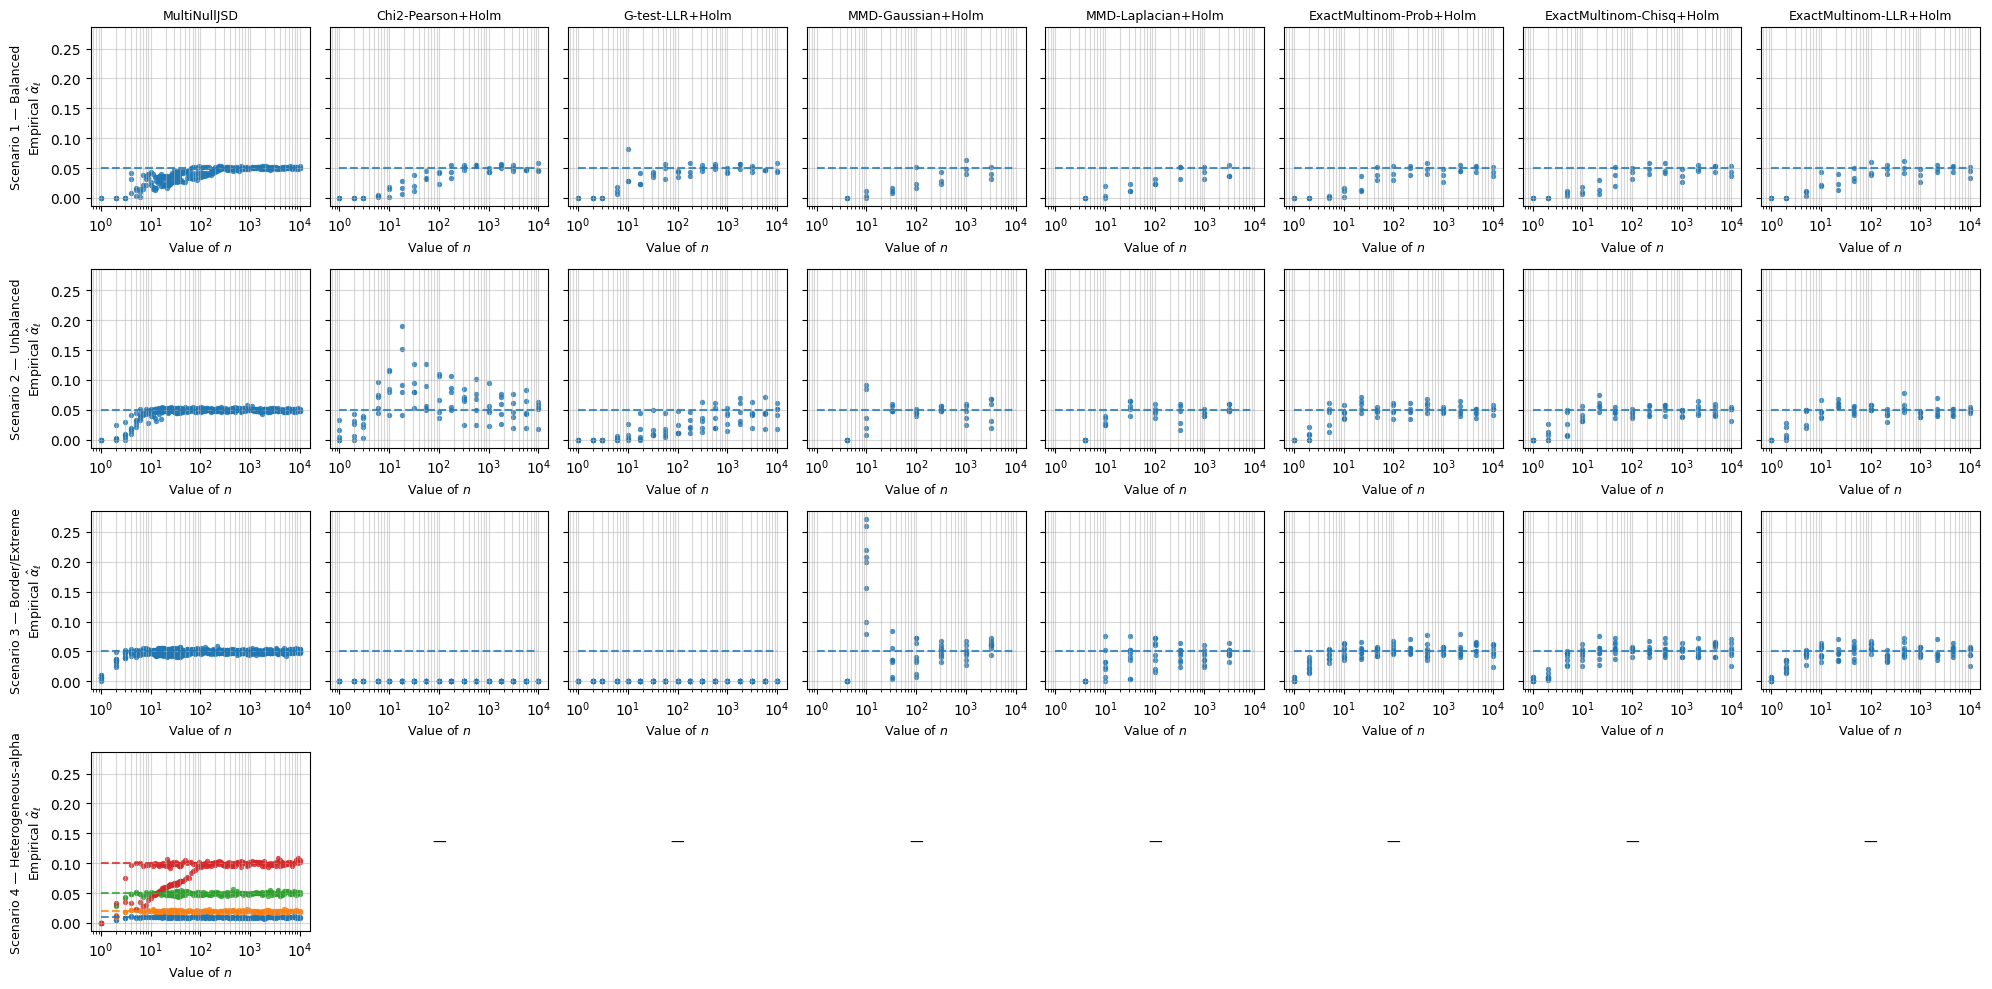

In [20]:
# Alpha analysis
type_i_df: pd.DataFrame = null_behavior[null_behavior["decision_type"] == "reject_all"].copy()
type_i_df["n"] = pd.to_numeric(arg=type_i_df["n"], errors="coerce")

# Figure size
fig, axes = plt.subplots(
    nrows=len(scenarios),
    ncols=len(methods),
    figsize=(2.5 * len(methods), 2.5 * len(scenarios)),
    sharex=True,
    sharey=True,
    squeeze=False,
)

n_values: npt.NDArray[float] = type_i_df["n"].unique()

for r, scenario in enumerate(scenarios):
    for c, method in enumerate(methods):

        ax: plt.Axes = axes[r, c]  # noqa
        sub_df: pd.DataFrame = type_i_df[
            (type_i_df["scenario_name"] == scenario) & (type_i_df["method"] == method)
            ]

        if sub_df.empty:
            ax.text(x=0.5, y=0.5, s="—", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            continue

        # Iteration over alpha_target values
        alpha_idx: npt.NDArray[float] = sub_df["alpha_target"].unique()
        for ell in alpha_idx:
            sub_a_target: pd.DataFrame = sub_df[sub_df["alpha_target"] == ell]  # noqa
            sc: PathCollection = ax.scatter(
                x=sub_a_target["n"].to_numpy(),
                y=sub_a_target["prop_val"].to_numpy(),
                s=15,
                alpha=0.8,
                linewidths=0,
            )
            ax.hlines(
                y=ell,
                xmin=n_values.min(),
                xmax=n_values.max(),
                linestyles="dashed",
                colors=[sc.get_facecolors()[0]],  # noqa
            )

        ax.set_xscale(value="log")
        ax.tick_params(axis="x", which="major", labelbottom=True)

        # Column titles (methods) on the top row
        if r == 0:
            ax.set_title(label=method, fontsize=9)

        # Row labels (scenarios) on the first column
        if c == 0:
            ax.set_ylabel(ylabel=f"{scenario}\nEmpirical $\\hat{{\\alpha}}_\\ell$", fontsize=9)

        # X label on the bottom row
        ax.set_xlabel(xlabel="Value of $n$", fontsize=9)

        ax.grid(visible=True, which="both", alpha=0.5)

fig.tight_layout()
plt.show()

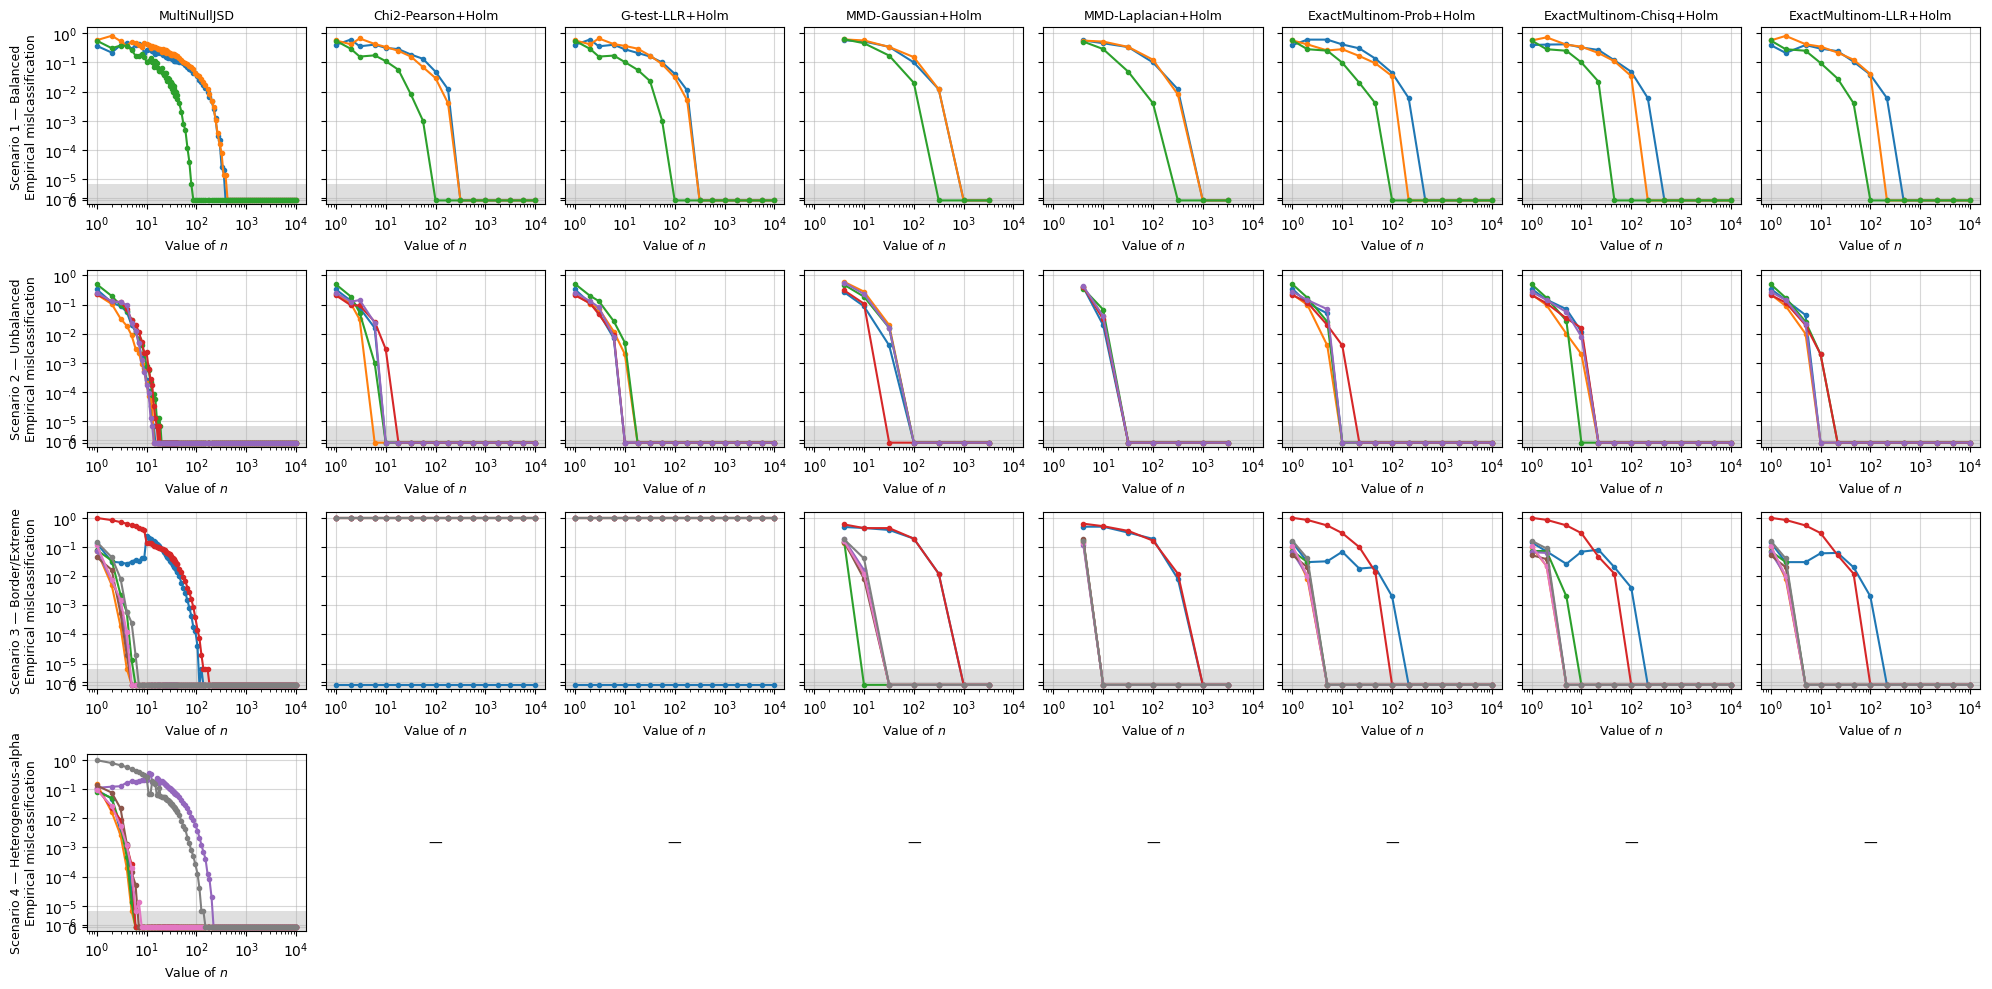

In [21]:
# Misclassification analysis
miss_df: pd.DataFrame = null_behavior[null_behavior["decision_type"] == "misclass"].copy()
miss_df["n"] = pd.to_numeric(arg=miss_df["n"], errors="coerce")

# Figure size
fig, axes = plt.subplots(
    nrows=len(scenarios),
    ncols=len(methods),
    figsize=(2.5 * len(methods), 2.5 * len(scenarios)),
    sharex=True,
    sharey=True,
    squeeze=False,
)

n_values: npt.NDArray[float] = miss_df["n"].unique()
min_prop: float = miss_df[miss_df["prop_val"] != 0.0]["prop_val"].min()

for r, scenario in enumerate(scenarios):
    for c, method in enumerate(methods):

        ax: plt.Axes = axes[r, c]  # noqa
        sub_df: pd.DataFrame = miss_df[
            (miss_df["scenario_name"] == scenario) & (miss_df["method"] == method)
        ]

        if sub_df.empty:
            ax.text(x=0.5, y=0.5, s="—", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            continue

        # Iteration over ell values
        null_idx: npt.NDArray[int] = sub_df["true_id"].unique().astype(dtype=int)
        for ell in null_idx:
            sub_ell: pd.DataFrame = sub_df[sub_df["true_id"] == ell]  # noqa
            ax.plot(
                sub_ell["n"].to_numpy(),
                sub_ell["prop_val"].to_numpy(),
                alpha=1.0,
                marker='.',
            )

        ax.set_xscale(value="log")
        ax.set_yscale(value="symlog", linthresh=min_prop, linscale=0.5)
        ax.axhspan(ymin=-min_prop / 4, ymax=min_prop, color="gray", alpha=0.25, zorder=0, linewidth=0)
        ax.set_ylim(bottom=-min_prop / 4)
        ax.tick_params(axis="x", which="both", labelbottom=True)

        # Column titles (methods) on the top row
        if r == 0:
            ax.set_title(label=method, fontsize=9)

        # Row labels (scenarios) on the first column
        if c == 0:
            ax.set_ylabel(ylabel=f"{scenario}\nEmpirical mislcassification", fontsize=9)

        # X label on the bottom row
        ax.set_xlabel(xlabel="Value of $n$", fontsize=9)

        ax.grid(True, which="major", alpha=0.5)

fig.tight_layout()
plt.show()

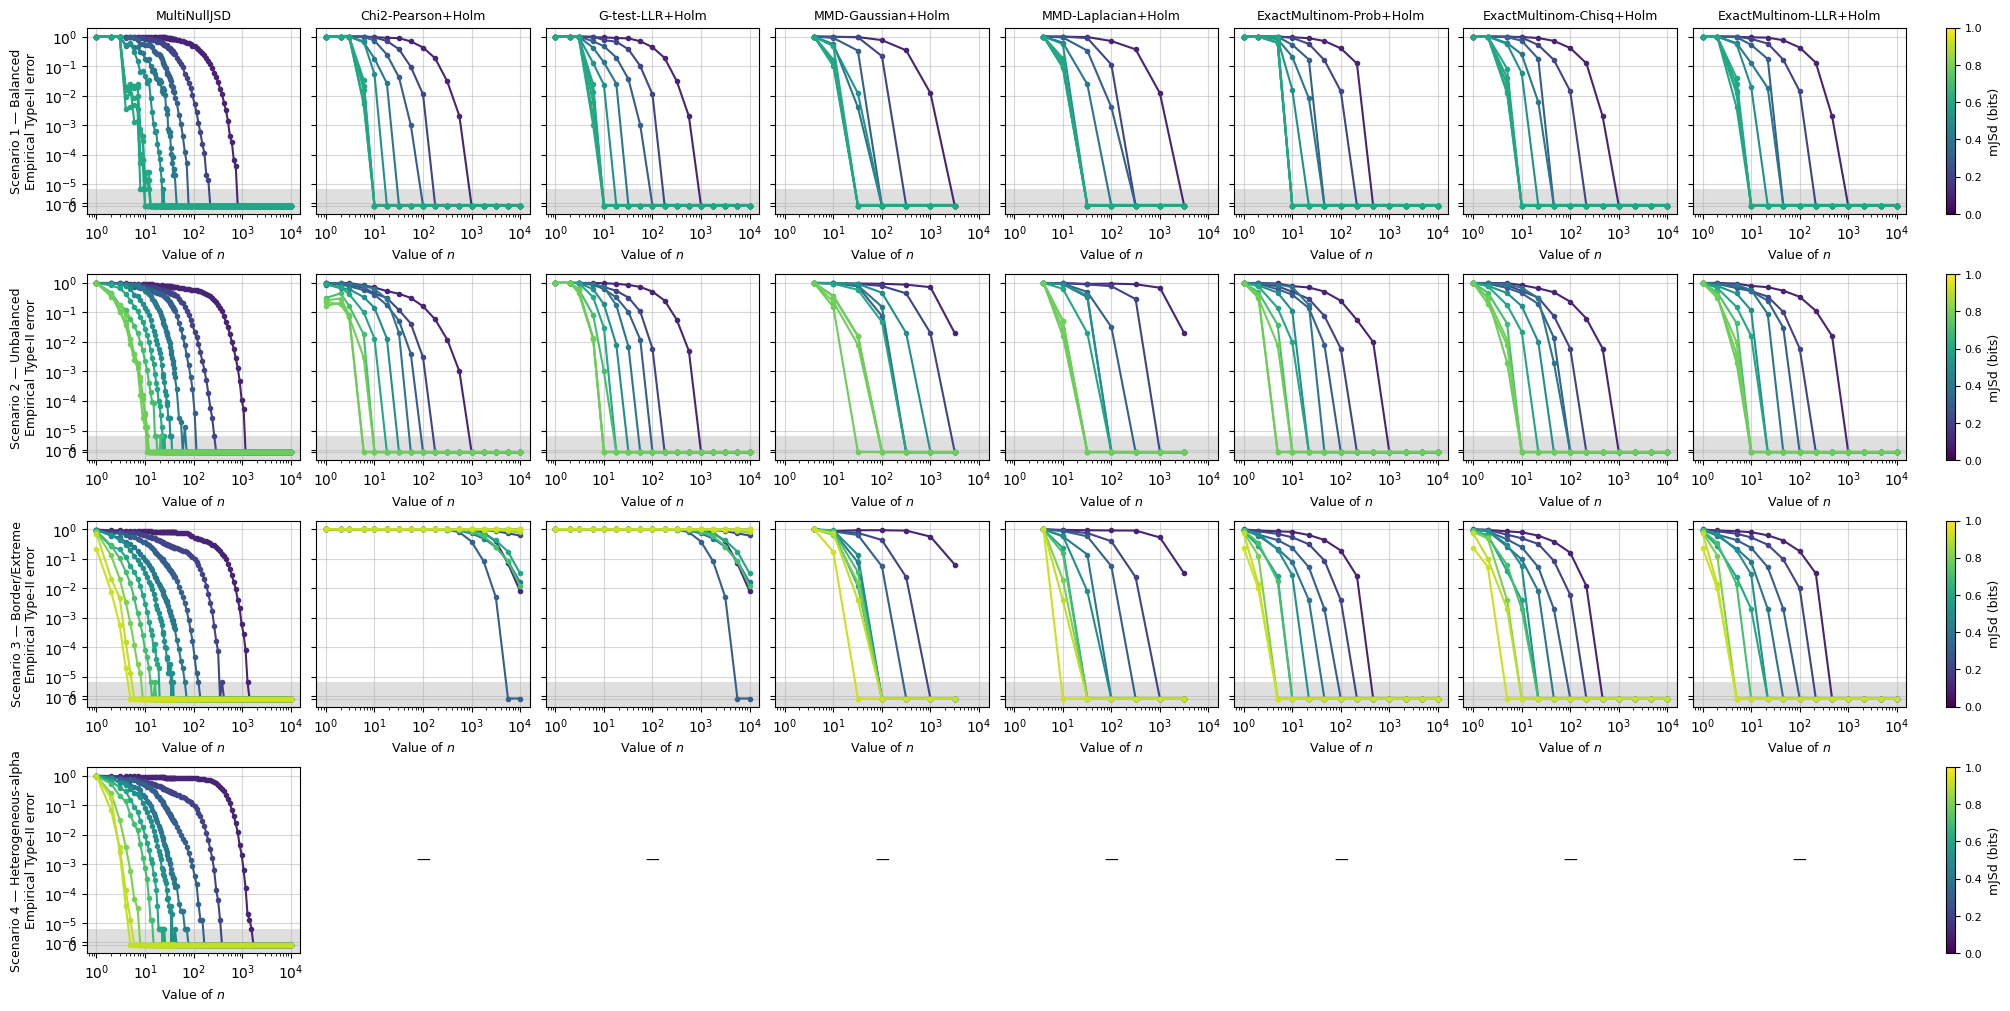

In [22]:
# Type-II error analysis
type_ii_df: pd.DataFrame = alt_behavior[alt_behavior["decision_type"] == "false_negative"].copy()
type_ii_df["n"] = pd.to_numeric(arg=type_ii_df["n"], errors="coerce")

# Figure size
fig, axes = plt.subplots(
    nrows=len(scenarios),
    ncols=len(methods),
    figsize=(2.5 * len(methods), 2.5 * len(scenarios)),
    sharex=True,
    sharey=True,
    squeeze=False,
    constrained_layout=True,
)

n_values: npt.NDArray[float] = type_ii_df["n"].unique()
min_prop: float = type_ii_df[type_ii_df["prop_val"] != 0.0]["prop_val"].min()


norm: mpl.colors.Normalize = mpl.colors.Normalize(
    vmin=0.0,
    vmax=1.0,
)
cmap = plt.cm.viridis  # noqa
sm: mpl.cm.ScalarMappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for r, scenario in enumerate(scenarios):
    row_axes: list[plt.Axes] = []
    for c, method in enumerate(methods):

        ax: plt.Axes = axes[r, c]  # noqa
        sub_df: pd.DataFrame = type_ii_df[
            (type_ii_df["scenario_name"] == scenario) & (type_ii_df["method"] == method)
        ]

        row_axes.append(ax)
        if sub_df.empty:
            ax.text(x=0.5, y=0.5, s="—", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            continue

        # Iteration over alt_id values
        alt_idx: npt.NDArray[int] = sub_df["true_id"].unique().astype(dtype=int)
        for ell in alt_idx:
            sub_alt: pd.DataFrame = sub_df[sub_df["true_id"] == ell]  # noqa
            ax.plot(
                sub_alt["n"].to_numpy(),
                sub_alt["prop_val"].to_numpy(),
                color=cmap(norm(sub_alt["mjsd"].iloc[0])),
                marker='.',
                alpha=1.0,
            )

        ax.set_xscale(value="log")
        ax.set_yscale(value="symlog", linthresh=min_prop, linscale=0.5)
        ax.axhspan(ymin=-min_prop / 2, ymax=min_prop, color="gray", alpha=0.25, zorder=0, linewidth=0)
        ax.set_ylim(bottom=-min_prop / 2)
        ax.tick_params(axis="x", which="major", labelbottom=True)

        # Column titles (methods) on the top row
        if r == 0:
            ax.set_title(label=method, fontsize=9)

        # Row labels (scenarios) on the first column
        if c == 0:
            ax.set_ylabel(ylabel=f"{scenario}\nEmpirical Type-II error", fontsize=9)

        # X label on the bottom row
        ax.set_xlabel(xlabel="Value of $n$", fontsize=9)

        ax.grid(True, which="major", alpha=0.5)

    if row_axes:
        cbar = fig.colorbar(
            mappable=sm,
            ax=row_axes,
            fraction=0.03,
            pad=0.02,
        )
        cbar.set_label("mJSd (bits)", fontsize=9)
        cbar.ax.tick_params(labelsize=8)

plt.show()

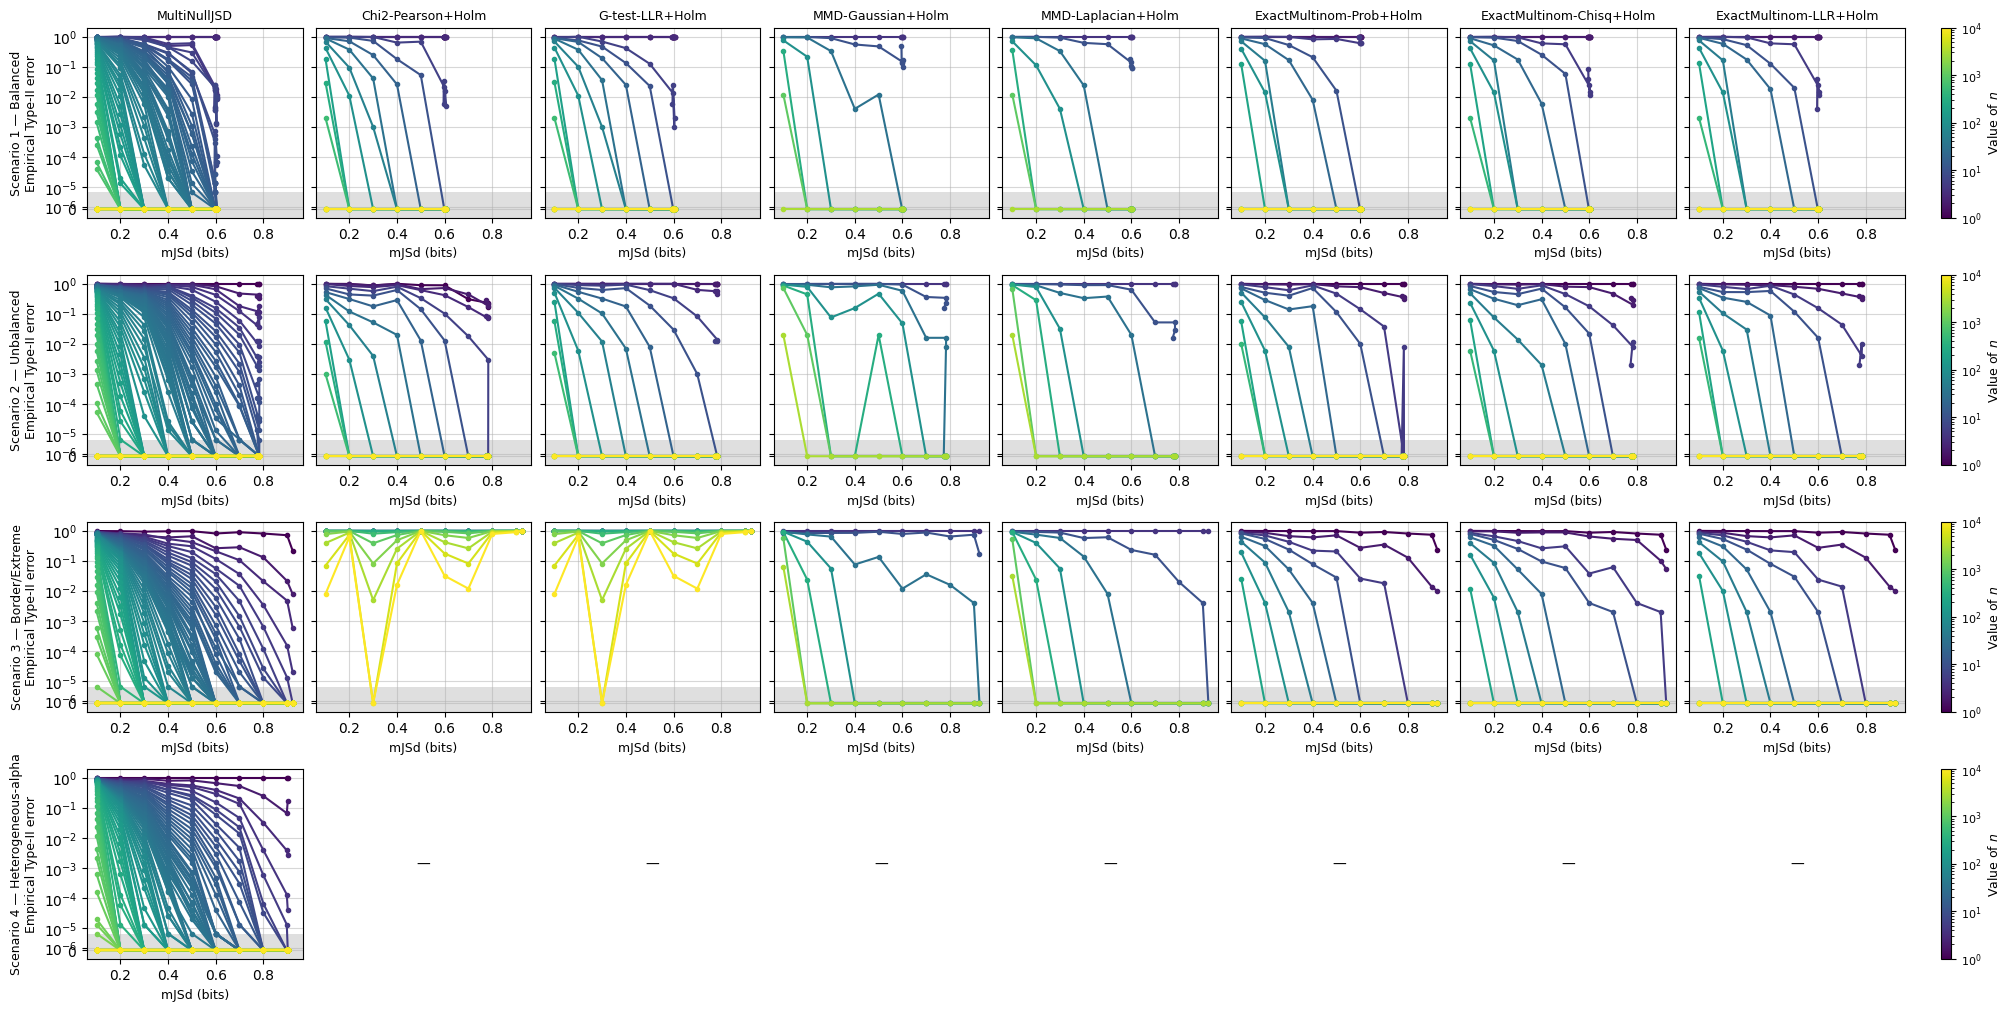

In [23]:
# Figure size
fig, axes = plt.subplots(
    nrows=len(scenarios),
    ncols=len(methods),
    figsize=(2.5 * len(methods), 2.5 * len(scenarios)),
    sharex=True,
    sharey=True,
    squeeze=False,
    constrained_layout=True,
)

n_values: npt.NDArray[float] = type_ii_df["n"].unique()
min_prop: float = type_ii_df[type_ii_df["prop_val"] != 0.0]["prop_val"].min()


norm: mpl.colors.LogNorm = mpl.colors.LogNorm(
    vmin=n_values.min(),
    vmax=n_values.max(),
)
cmap = plt.cm.viridis  # noqa
sm: mpl.cm.ScalarMappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for r, scenario in enumerate(scenarios):
    row_axes: list[plt.Axes] = []
    for c, method in enumerate(methods):

        ax: plt.Axes = axes[r, c]  # noqa
        sub_df: pd.DataFrame = type_ii_df[
            (type_ii_df["scenario_name"] == scenario) & (type_ii_df["method"] == method)
        ]

        row_axes.append(ax)
        if sub_df.empty:
            ax.text(x=0.5, y=0.5, s="—", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            continue

        # Iteration over n values
        n_vals: npt.NDArray[int] = sub_df["n"].unique().astype(dtype=int)
        for n in n_vals:
            sub_n: pd.DataFrame = sub_df[sub_df["n"] == n]  # noqa
            ax.plot(
                sub_n["mjsd"].to_numpy(),
                sub_n["prop_val"].to_numpy(),
                color=cmap(norm(sub_n["n"].iloc[0])),
                marker='.',
                alpha=1.0,
            )

        ax.set_yscale(value="symlog", linthresh=min_prop, linscale=0.5)
        ax.axhspan(ymin=-min_prop / 2, ymax=min_prop, color="gray", alpha=0.25, zorder=0, linewidth=0)
        ax.set_ylim(bottom=-min_prop / 2)
        ax.tick_params(axis="x", which="major", labelbottom=True)

        # Column titles (methods) on the top row
        if r == 0:
            ax.set_title(label=method, fontsize=9)

        # Row labels (scenarios) on the first column
        if c == 0:
            ax.set_ylabel(ylabel=f"{scenario}\nEmpirical Type-II error", fontsize=9)

        # X label on the bottom row
        ax.set_xlabel(xlabel="mJSd (bits)", fontsize=9)

        ax.grid(True, which="major", alpha=0.5)

    if row_axes:
        cbar = fig.colorbar(
            mappable=sm,
            ax=row_axes,
            fraction=0.03,
            pad=0.02,
        )
        cbar.set_label("Value of $n$", fontsize=9)
        cbar.ax.tick_params(labelsize=8)

plt.show()

In [24]:
df.columns

Index(['scenario_name', 'method', 'n', 'true_kind', 'true_id', 'decision',
       'count', 'prop', 'm', 'scenario_slug', 'alpha_global', 'mjsd_target',
       'mjsd', 'mjsd_error', 'closest_null', 'L', 'k', 'm_used',
       'alpha_target_per_null', 'alpha_target_method', 'alpha_hat_empirical',
       'alpha_ci_low', 'alpha_ci_high', 'alpha_backend', 'fwer_backend',
       'p_correct', 'p_reject_all', 'p_misclass', 'cdf_method', 'mc_samples',
       'mc_seed', 'power_hat_empirical', 'power_ci_low', 'power_ci_high',
       'type2_hat_empirical', 'beta_backend', 'power_backend',
       'runtime_infer_s', 'runtime_per_hist_s', 'runtime_make_test_s',
       'runtime_backend_s', 'runtime_total_method_s', 'm_null', 'm_alt',
       'runtime_total_s', 'fwer_hat_empirical', 'fwer_target_method', 'n_jobs',
       'n_chunks', 'parallel_backend', 'show_progress', 'mp_start_method'],
      dtype='str')

In [25]:
runtime_df: pd.DataFrame = (
    df
    .groupby(by=["scenario_name", "method", "n", "true_kind", "true_id"])
    .agg(
        runtime_per_hist_par=("runtime_per_hist_s", "first"),
        n_jobs=("n_jobs", "first"),
    )
    .reset_index()
)
runtime_df["n_jobs"] = runtime_df["n_jobs"].fillna(value=1.0)
runtime_df["runtime_per_hist_ser"] = runtime_df["runtime_per_hist_par"] * runtime_df["n_jobs"]

runtime_df

,scenario_name,method,n,true_kind,true_id,runtime_per_hist_par,n_jobs,runtime_per_hist_ser
0,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,alt,1,0.002319,50.0,0.115974
1,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,alt,2,0.002389,50.0,0.119434
2,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,alt,3,0.002361,50.0,0.118038
3,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,alt,4,0.002331,50.0,0.116532
4,Scenario 1 — Balanced,Chi2-Pearson+Holm,1,alt,5,0.002345,50.0,0.117262
...,...,...,...,...,...,...,...,...
10397,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,4,0.000011,1.0,0.000011
10398,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,5,0.000011,1.0,0.000011
10399,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,6,0.000011,1.0,0.000011
10400,Scenario 4 — Heterogeneous-alpha,MultiNullJSD,10000,null,7,0.000011,1.0,0.000011


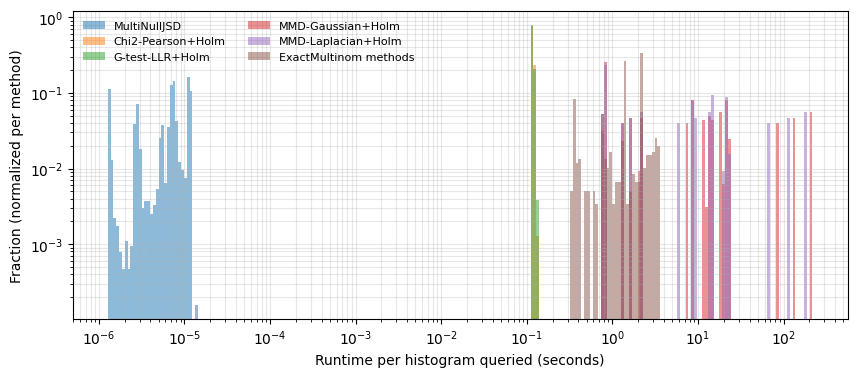

In [26]:
runtime_col: str = "runtime_per_hist_ser"

rt: pd.DataFrame = runtime_df[["method", runtime_col]].copy()
rt[runtime_col] = pd.to_numeric(arg=rt[runtime_col], errors="coerce")
rt = rt[np.isfinite(rt[runtime_col].to_numpy())]

# Log-scale needs strictly positive values
rt = rt[rt[runtime_col] > 0]

# Common log-spaced bins across all methods (equispaced in log scale)
all_vals: npt.NDArray[float] = rt[runtime_col].to_numpy(dtype=float)
vmin: float = float(all_vals.min())
vmax: float = float(all_vals.max())

num_bins: int = 250
bins: npt.NDArray[np.float64] = np.logspace(
    start=np.log10(vmin),
    stop=np.log10(vmax),
    num=num_bins + 1
)

fig, ax = plt.subplots(figsize=(10, 4))

for method in methods:
    if method.startswith("Exact") and method != "ExactMultinom-Prob+Holm":
        continue
    vals: pd.Series = rt.loc[  # noqa
        rt["method"] == method, runtime_col
    ].to_numpy(dtype=float)
    if vals.size == 0:
        continue

    # Normalize counts PER method (sum of bar heights = 1)
    weights: npt.NDArray[float] = np.ones_like(a=vals, dtype=float) / float(vals.size)

    ax.hist(
        x=vals,
        bins=bins,
        weights=weights,
        histtype="stepfilled",   # use "stepfilled" if you prefer filled
        linewidth=1.5,
        alpha=0.5,
        label=method if method != "ExactMultinom-Prob+Holm" else "ExactMultinom methods",
    )

ax.set_xscale(value="log")
ax.set_yscale(value="log")
ax.set_xlabel(xlabel="Runtime per histogram queried (seconds)")
ax.set_ylabel(ylabel="Fraction (normalized per method)")
ax.grid(visible=True, which="both", alpha=0.3)

ax.xaxis.set_major_locator(locator=mticker.LogLocator(base=10))
ax.xaxis.set_minor_locator(locator=mticker.LogLocator(base=10, subs=np.arange(2, 10) * 0.1))
ax.xaxis.set_minor_formatter(formatter=mticker.NullFormatter())

ax.legend(fontsize=8, ncol=2, frameon=False)
plt.show()